In [4]:
import pandas as pd

# Load the dataset
file_path = "Downloads\phone_usage_india.csv"  # Update if the path is different
df = pd.read_csv(file_path)

# Display basic dataset info
print("\n First 5 Rows of Dataset:")
print(df.head())

print("\n Dataset Info:")
print(df.info())

print("\n Summary Statistics:")
print(df.describe(include="all"))

print("\n Missing Values in Each Column:")
print(df.isnull().sum())

print("\n Duplicate Rows Count:")
print(df.duplicated().sum())


 First 5 Rows of Dataset:
  User ID  Age  Gender   Location Phone Brand       OS  Screen Time (hrs/day)  \
0  U00001   53    Male     Mumbai        Vivo  Android                    3.7   
1  U00002   60   Other      Delhi      Realme      iOS                    9.2   
2  U00003   37  Female  Ahmedabad       Nokia  Android                    4.5   
3  U00004   32    Male       Pune     Samsung  Android                   11.0   
4  U00005   16    Male     Mumbai      Xiaomi      iOS                    2.2   

   Data Usage (GB/month)  Calls Duration (mins/day)  Number of Apps Installed  \
0                   23.9                       37.9                       104   
1                   28.1                       13.7                       169   
2                   12.3                       66.8                        96   
3                   25.6                      156.2                       146   
4                    2.5                      236.2                        86   


<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
C:\Users\ratnakar\AppData\Local\Temp\ipykernel_34576\2699984802.py:4: SyntaxWarning: invalid escape sequence '\p'
  file_path = "Downloads\phone_usage_india.csv"  # Update if the path is different


In [6]:
import pandas as pd
import numpy as np

# Load dataset (update the path if needed)
file_path = "Downloads/phone_usage_india.csv"
df = pd.read_csv(file_path)

# 1. Drop 'User ID' (not useful for ML)
df.drop(columns=['User ID'], inplace=True)

# 2. Handling Outliers using IQR Method
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

numeric_columns = [
    "Age", "Screen Time (hrs/day)", "Data Usage (GB/month)",
    "Calls Duration (mins/day)", "Number of Apps Installed",
    "Social Media Time (hrs/day)", "E-commerce Spend (INR/month)",
    "Streaming Time (hrs/day)", "Gaming Time (hrs/day)", "Monthly Recharge Cost (INR)"
]

df = remove_outliers(df, numeric_columns)

# 3. Encoding Categorical Variables
categorical_columns = ["Gender", "Location", "Phone Brand", "OS", "Primary Use"]
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Save the cleaned dataset
df.to_csv("cleaned_phone_usage_data.csv", index=False)

print("Data cleaning complete! Cleaned dataset saved as 'cleaned_phone_usage_data.csv'.")

Data cleaning complete! Cleaned dataset saved as 'cleaned_phone_usage_data.csv'.


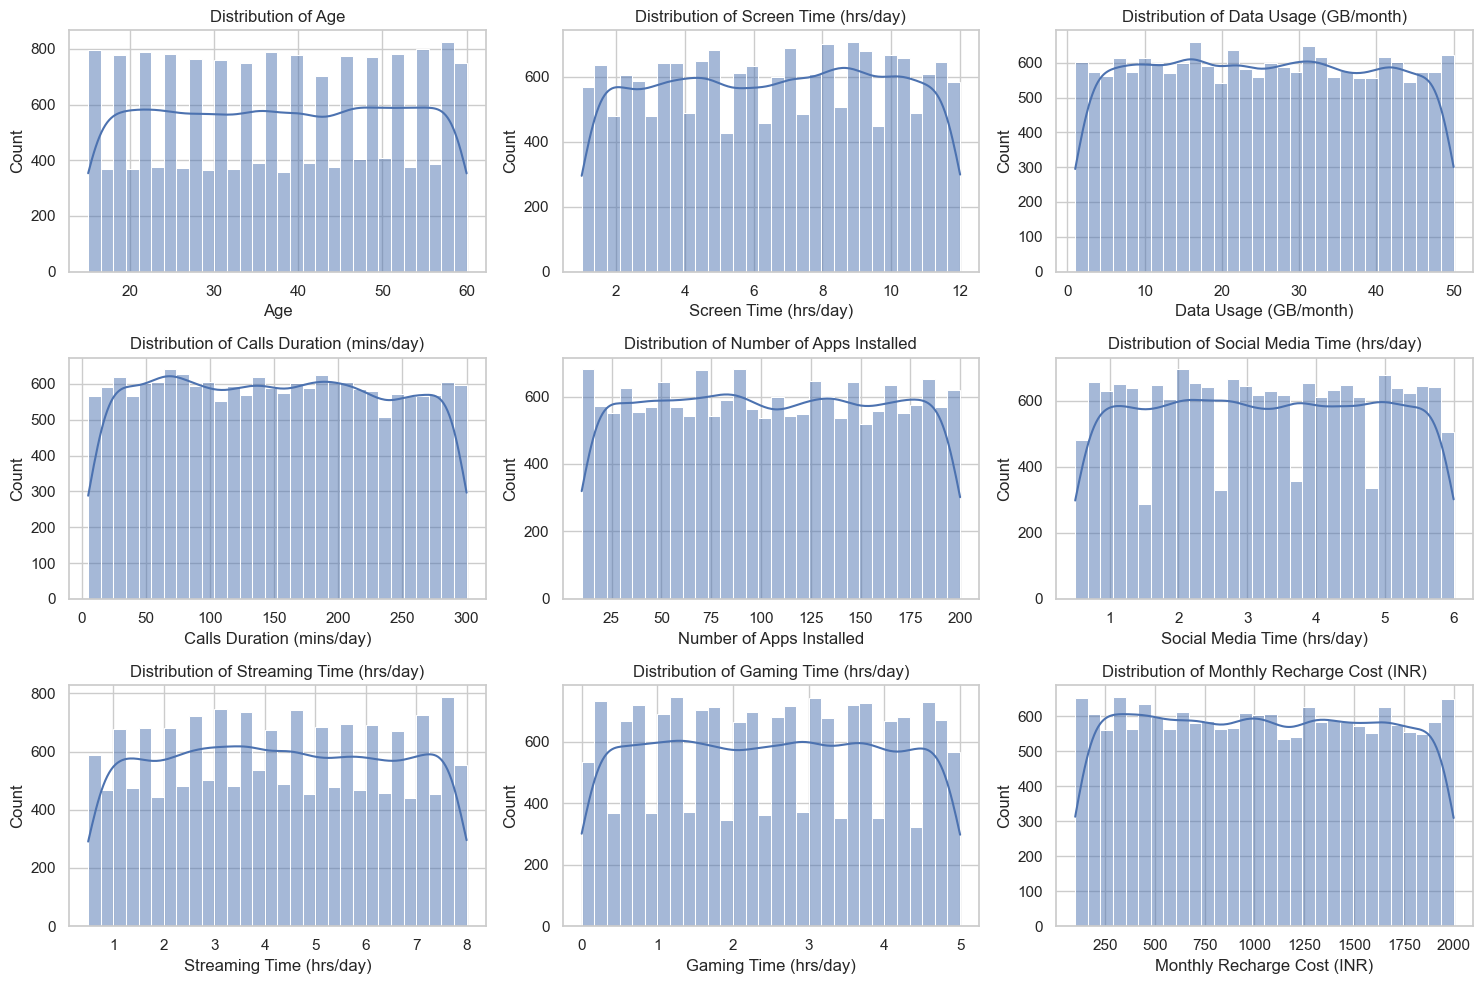

C:\Users\ratnakar\AppData\Local\Temp\ipykernel_34576\3325648885.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")
C:\Users\ratnakar\AppData\Local\Temp\ipykernel_34576\3325648885.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")
C:\Users\ratnakar\AppData\Local\Temp\ipykernel_34576\3325648885.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")
C:\Users\ratnakar\AppData\Local\Temp\ipykernel_34576\3325648885.py:42: FutureWarning: 

Passin

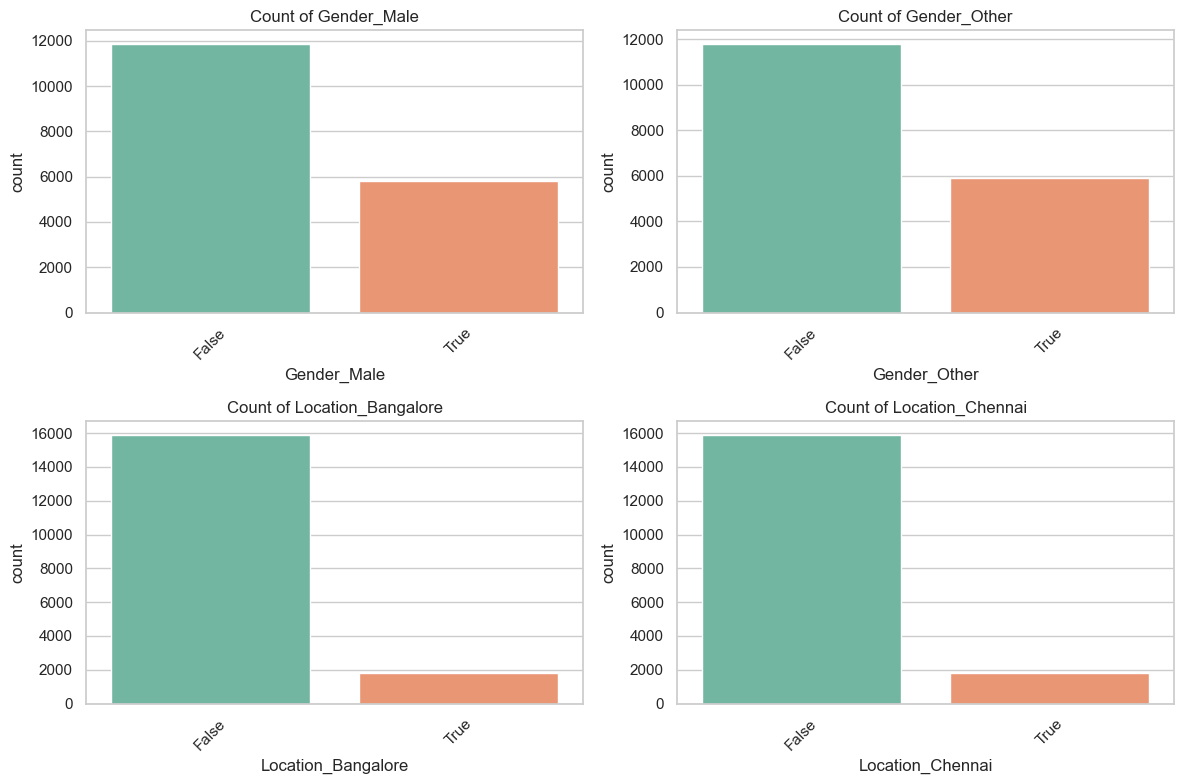

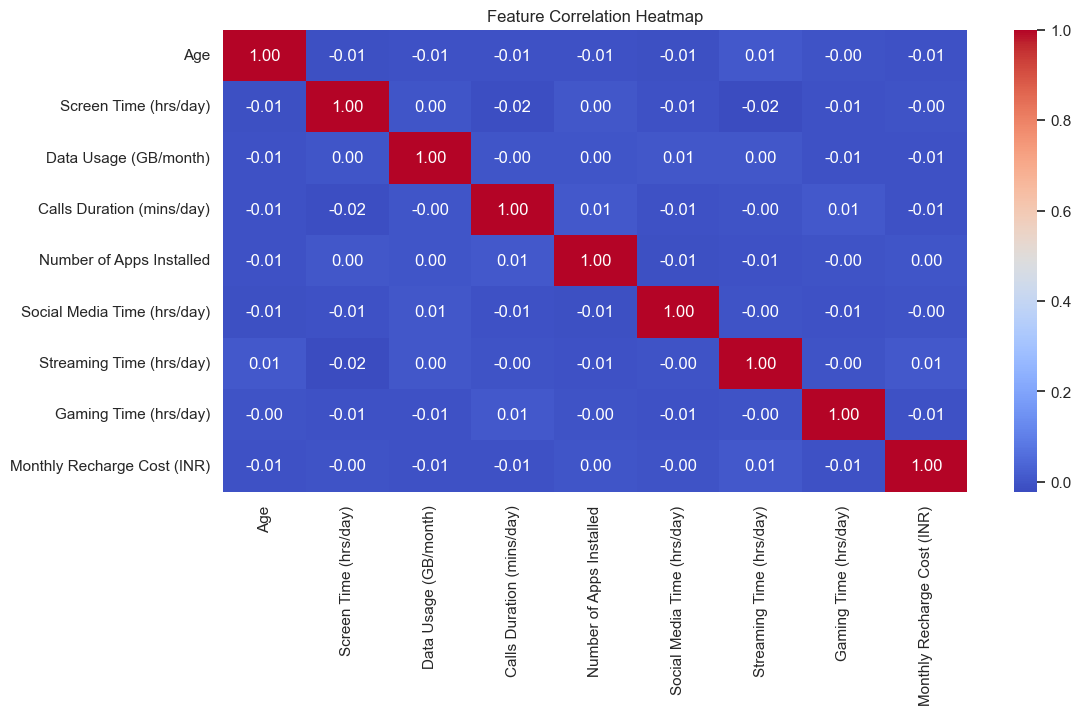

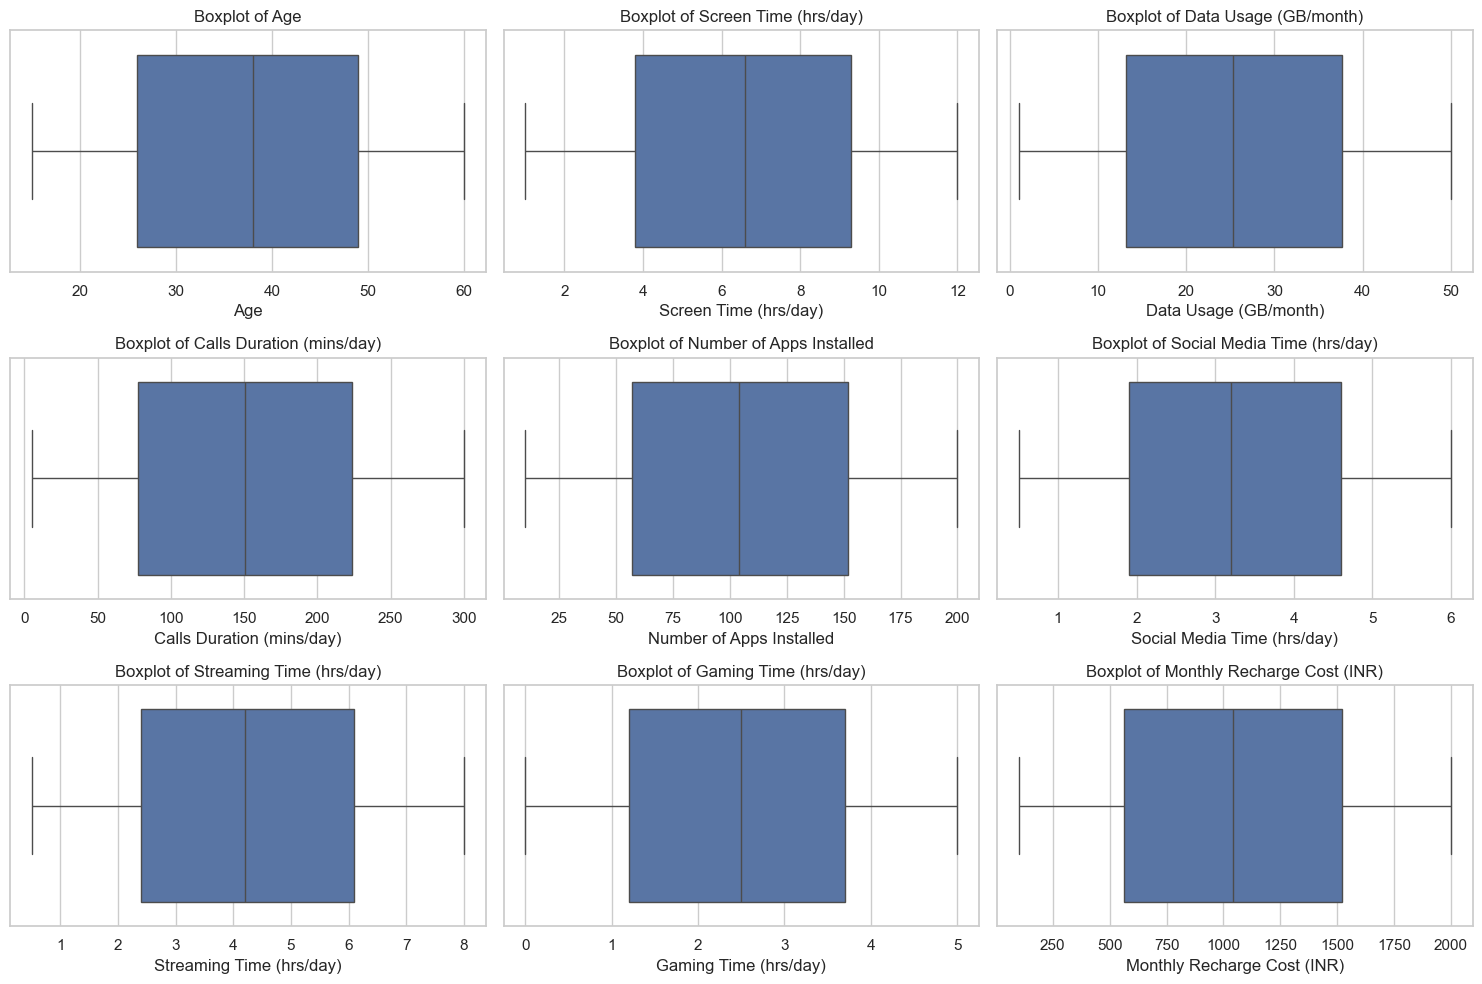

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv("cleaned_phone_usage_data.csv")

# Set style
sns.set(style="whitegrid")

# 1. Feature Distributions
numerical_features = ['Age', 'Screen Time (hrs/day)', 'Data Usage (GB/month)',
                      'Calls Duration (mins/day)', 'Number of Apps Installed',
                      'Social Media Time (hrs/day)', 'Streaming Time (hrs/day)',
                      'Gaming Time (hrs/day)', 'Monthly Recharge Cost (INR)']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# 2. Categorical Features Count Plots
categorical_features = [
    "Gender_Male", "Gender_Other",  # Gender categories
    "Location_Bangalore", "Location_Chennai", "Location_Delhi", 
    "Location_Hyderabad", "Location_Jaipur", "Location_Kolkata", 
    "Location_Lucknow", "Location_Mumbai", "Location_Pune",  # Locations
    "Phone Brand_Google Pixel", "Phone Brand_Motorola", "Phone Brand_Nokia", 
    "Phone Brand_OnePlus", "Phone Brand_Oppo", "Phone Brand_Realme", 
    "Phone Brand_Samsung", "Phone Brand_Vivo", "Phone Brand_Xiaomi",  # Brands
    "Primary Use_Entertainment", "Primary Use_Gaming", 
    "Primary Use_Social Media", "Primary Use_Work"  # Primary Use
]

plt.figure(figsize=(12, 8))

for i, col in enumerate(categorical_features[:4], 1):  # Plot only the first 4
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# 4. Box Plots for Outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

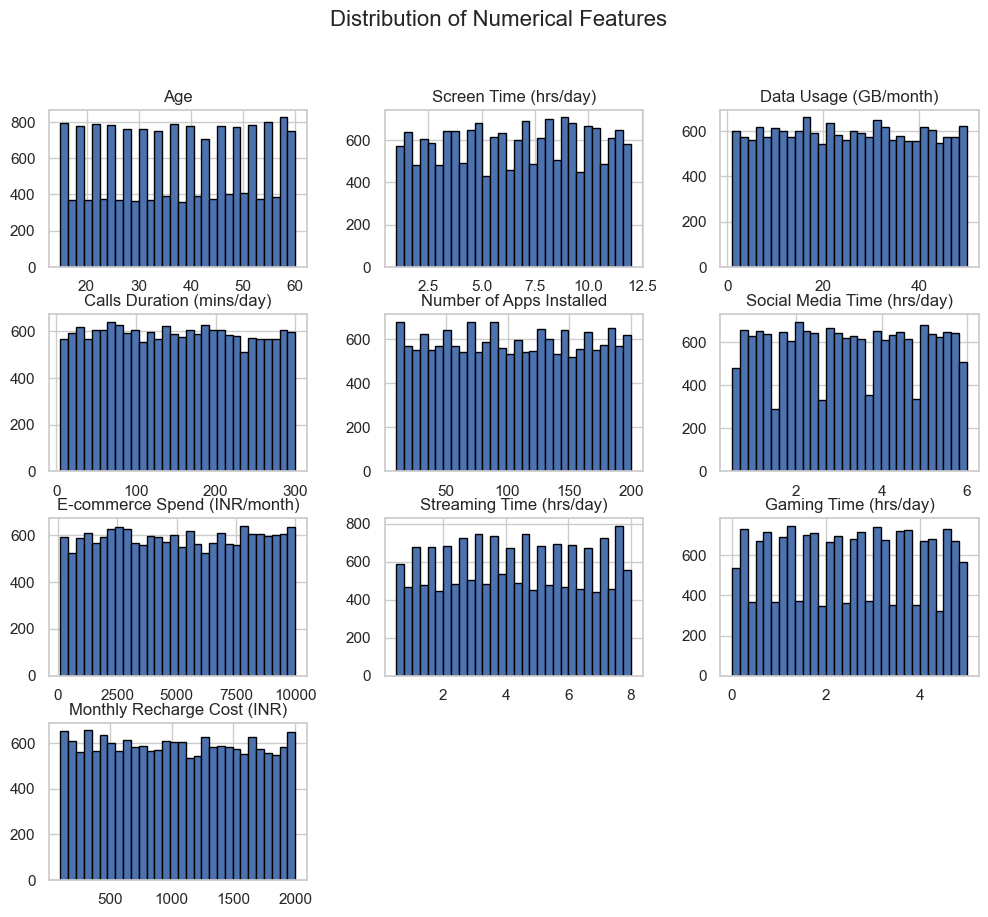

In [10]:
#Distribution of Numerical Variables
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

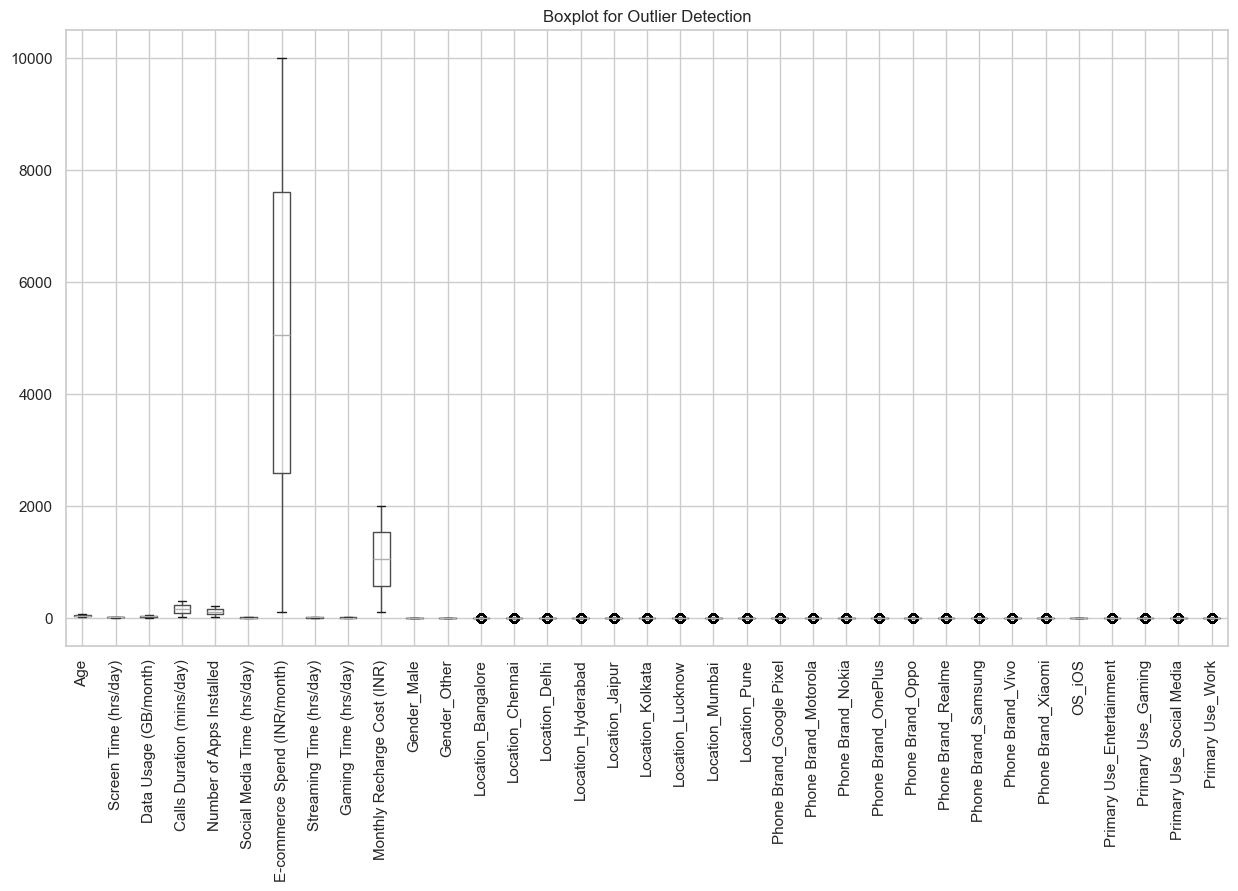

In [12]:
# Outlier Detection (Boxplots)
plt.figure(figsize=(15, 8))
df.boxplot(rot=90)  # Rotate labels for readability
plt.title("Boxplot for Outlier Detection")
plt.show()

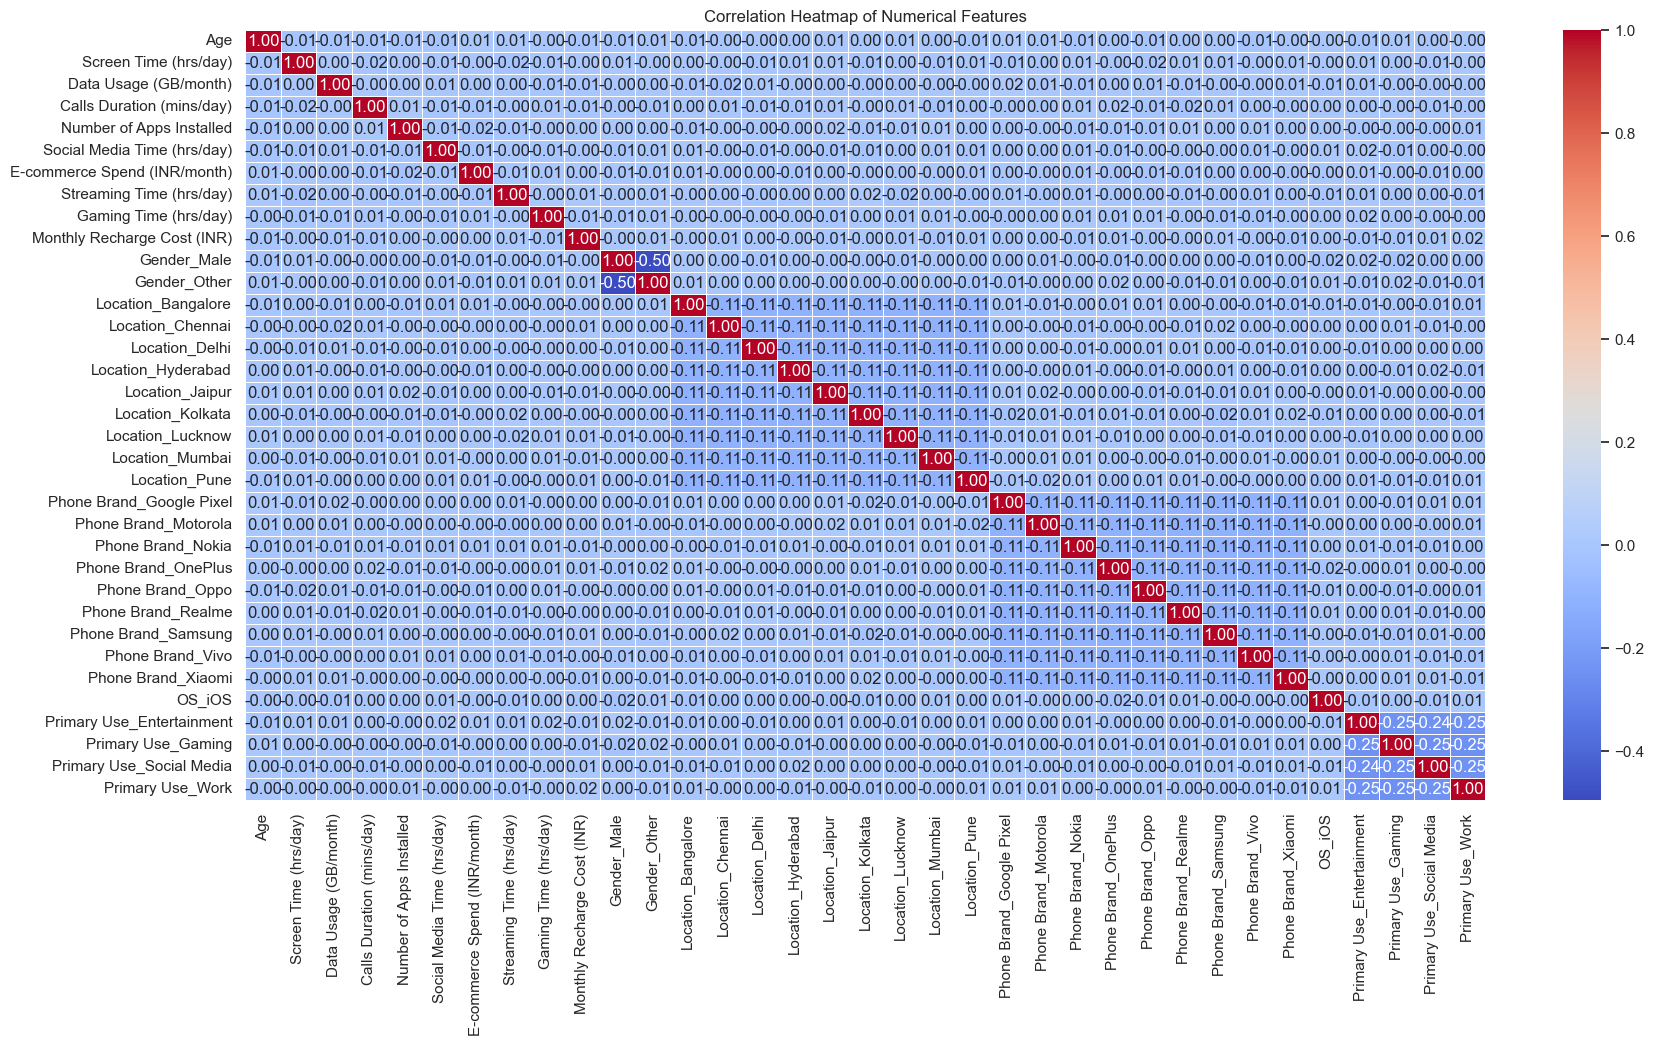

In [14]:
# Check Correlations Between Numerical Features
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [16]:
#  Feature Engineering & Preprocessing

# Handle Outliers

from scipy.stats.mstats import winsorize

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = winsorize(df[col], limits=[0.01, 0.01])  # Trim 1% extreme values

In [18]:
# Normalize/Standardize Numerical Features

from sklearn.preprocessing import StandardScaler

num_cols = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [20]:
# Splitting Data for Training & Testing

# Define target variable (multi-class)
target_columns = ['Primary Use_Entertainment', 'Primary Use_Gaming', 'Primary Use_Social Media', 'Primary Use_Work']

# Define features (exclude target columns)
X = df.drop(columns=target_columns)
y = df[target_columns]  # Multi-label classification

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
# training one model

# Find columns related to Primary Use
primary_use_columns = ['Primary Use_Entertainment', 'Primary Use_Gaming', 'Primary Use_Social Media', 'Primary Use_Work']

# Convert One-Hot Encoding back to a single categorical column
y = df[primary_use_columns].idxmax(axis=1)  # Get the column with max value
y = y.str.replace("Primary Use_", "")  # Remove prefix

# Split again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
# Step 1: Train a Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize Logistic Regression

logreg = LogisticRegression(max_iter=1000, multi_class='ovr', solver='liblinear')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.3988


C:\Users\ratnakar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Training Logistic Regression...
Logistic Regression Accuracy: 0.3988
               precision    recall  f1-score   support

Entertainment       0.40      1.00      0.57      1411
       Gaming       0.00      0.00      0.00       715
 Social Media       0.00      0.00      0.00       700
         Work       0.00      0.00      0.00       712

     accuracy                           0.40      3538
    macro avg       0.10      0.25      0.14      3538
 weighted avg       0.16      0.40      0.23      3538

--------------------------------------------------
Training Decision Tree...


C:\Users\ratnakar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\ratnakar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ratnakar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ratnakar\anaconda3\Lib\site-packages\sklearn\

Decision Tree Accuracy: 0.2671
               precision    recall  f1-score   support

Entertainment       0.38      0.37      0.37      1411
       Gaming       0.21      0.21      0.21       715
 Social Media       0.20      0.20      0.20       700
         Work       0.19      0.19      0.19       712

     accuracy                           0.27      3538
    macro avg       0.24      0.24      0.24      3538
 weighted avg       0.27      0.27      0.27      3538

--------------------------------------------------
Training Random Forest...
Random Forest Accuracy: 0.3878
               precision    recall  f1-score   support

Entertainment       0.40      0.94      0.56      1411
       Gaming       0.28      0.03      0.06       715
 Social Media       0.12      0.01      0.02       700
         Work       0.19      0.01      0.03       712

     accuracy                           0.39      3538
    macro avg       0.25      0.25      0.17      3538
 weighted avg       0.28      0

C:\Users\ratnakar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ratnakar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ratnakar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM Accuracy: 0.3988
               precision    recall  f1-score   support

Entertainment       0.40      1.00      0.57      1411
       Gaming       0.00      0.00      0.00       715
 Social Media       0.00      0.00      0.00       700
         Work       0.00      0.00      0.00       712

     accuracy                           0.40      3538
    macro avg       0.10      0.25      0.14      3538
 weighted avg       0.16      0.40      0.23      3538

--------------------------------------------------


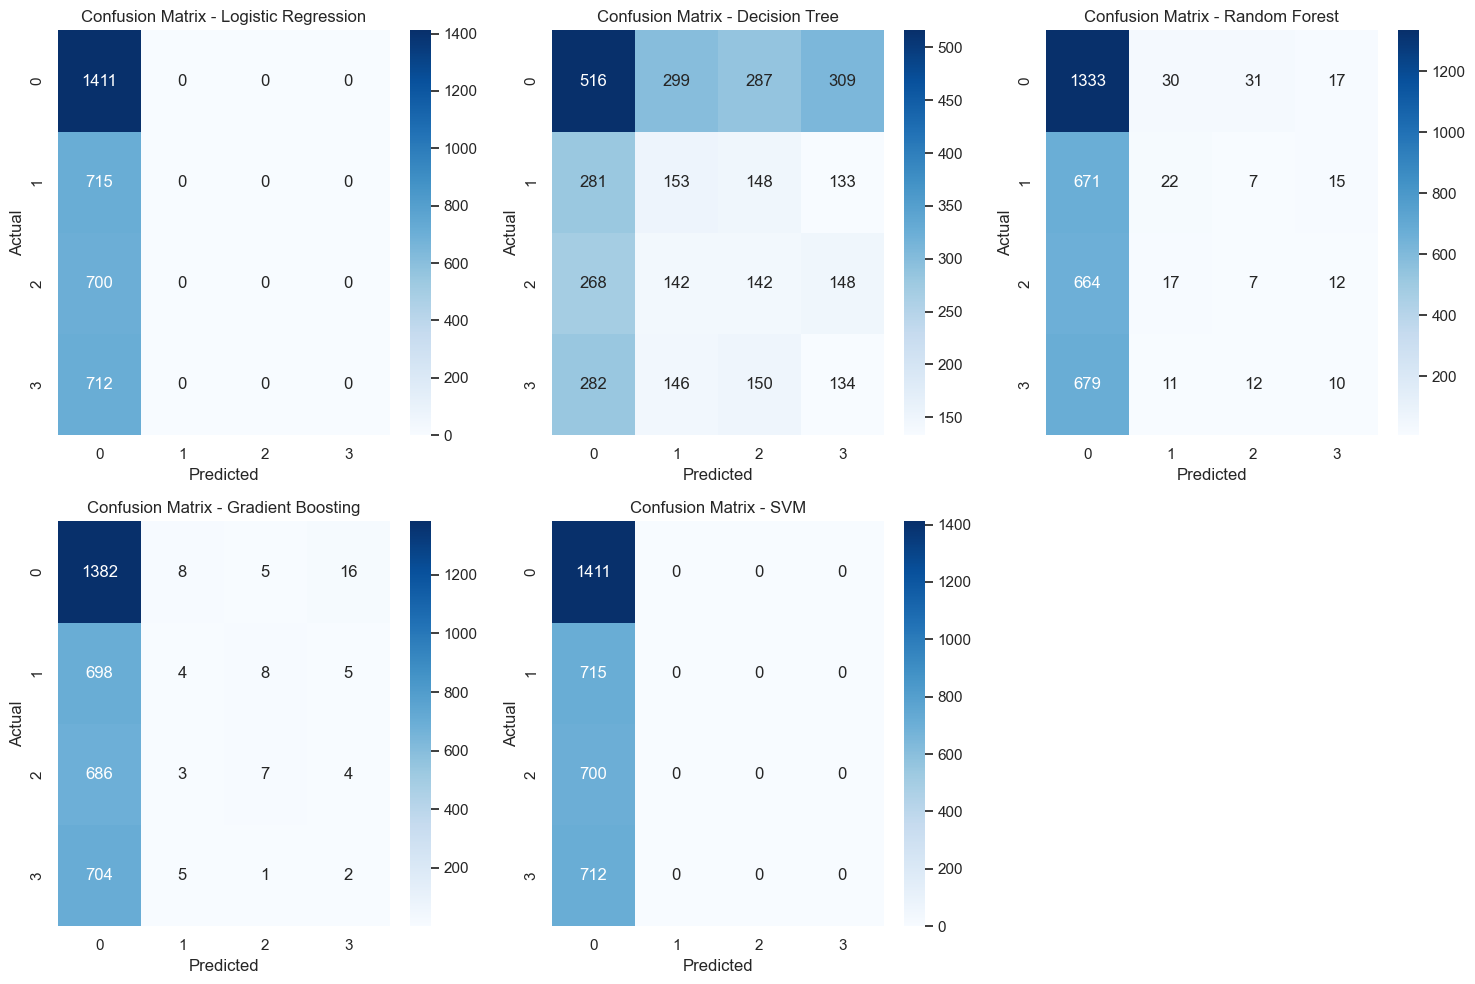

C:\Users\ratnakar\AppData\Local\Temp\ipykernel_34576\682431356.py:61: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  fpr, tpr, _ = roc_curve(y_test.ravel(), y_prob[:, 1].ravel())


ValueError: multiclass format is not supported

<Figure size 1000x700 with 0 Axes>

In [26]:
# Training and comparing 5 models 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, multi_class='ovr', solver='liblinear'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True)
}

# Dictionary to store results
results = {}

# Train and evaluate models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    # Store results
    results[name] = {
        "accuracy": accuracy,
        "classification_report": report,
        "confusion_matrix": cm
    }
    
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(report)
    print("-" * 50)

# Plot Confusion Matrices
plt.figure(figsize=(15, 10))
for i, (name, result) in enumerate(results.items(), 1):
    plt.subplot(2, 3, i)
    sns.heatmap(result["confusion_matrix"], annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()


C:\Users\ratnakar\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\ratnakar\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\ratnakar\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\ratnakar\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\ratnakar\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\ratnakar\anaconda3\Li

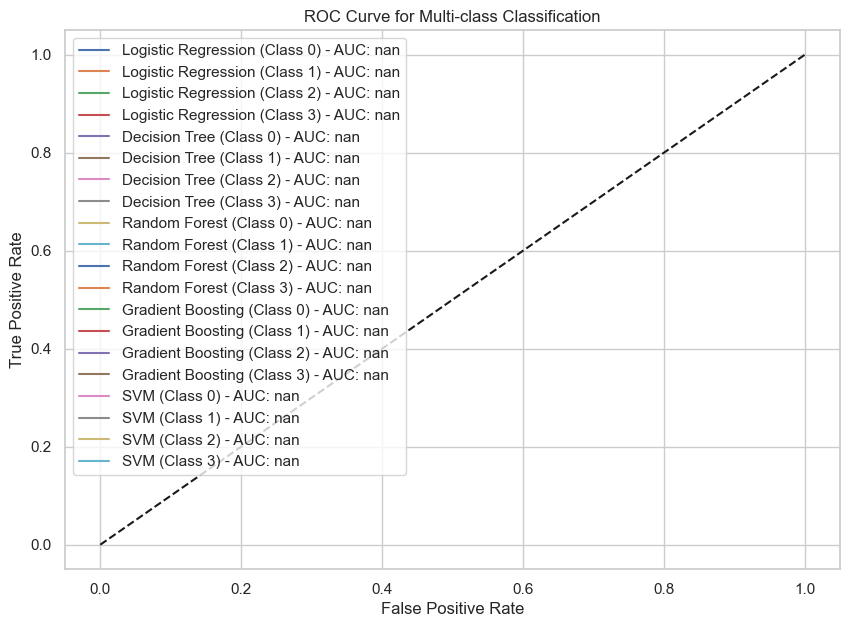

In [29]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the target variable for multi-class ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])  # Adjust class labels if needed

plt.figure(figsize=(10, 7))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)
    
    for i in range(y_test_bin.shape[1]):  # Loop through each class
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (Class {i}) - AUC: {roc_auc:.2f}')
    
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-class Classification')
plt.legend()
plt.show()

In [ ]:
# Model Comparison and Best Choice
# Results indicate poor performance across all models, with accuracy below 40% and imbalanced predictions (most models predict "Entertainment" for almost everything). Here's a breakdown:

# Model	Accuracy	Key Issues
# Logistic Regression	39.88%	Only predicts "Entertainment" correctly, no recall for other classes
# Decision Tree	26.57%	Weak predictions across all classes, poor generalization
# Random Forest	38.64%	Slightly better than Decision Tree but still overpredicts "Entertainment"
# Gradient Boosting	39.40%	Similar issues as Random Forest, slightly better recall
# SVM	39.88%	Same issue as Logistic Regression, ignores other classes


# Best Model?
# Right now, Gradient Boosting is the best choice because: ✅ It achieves the best recall for "Entertainment" (98%), meaning it correctly identifies those users.
# ✅ It has the highest macro-average recall, meaning it does slightly better at capturing other classes.
# ✅ Tree-based models generally handle structured data better than linear models like Logistic Regression or SVM.



K-Means Silhouette Score: 0.0952


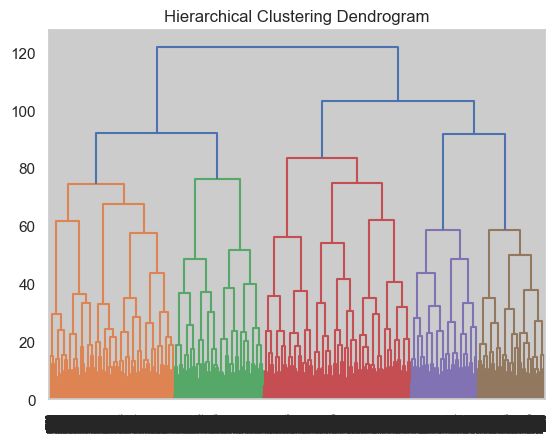

Hierarchical Clustering Silhouette Score: 0.0459
DBSCAN Silhouette Score: None
GMM Silhouette Score: 0.0907
Spectral Clustering Silhouette Score: 0.0854


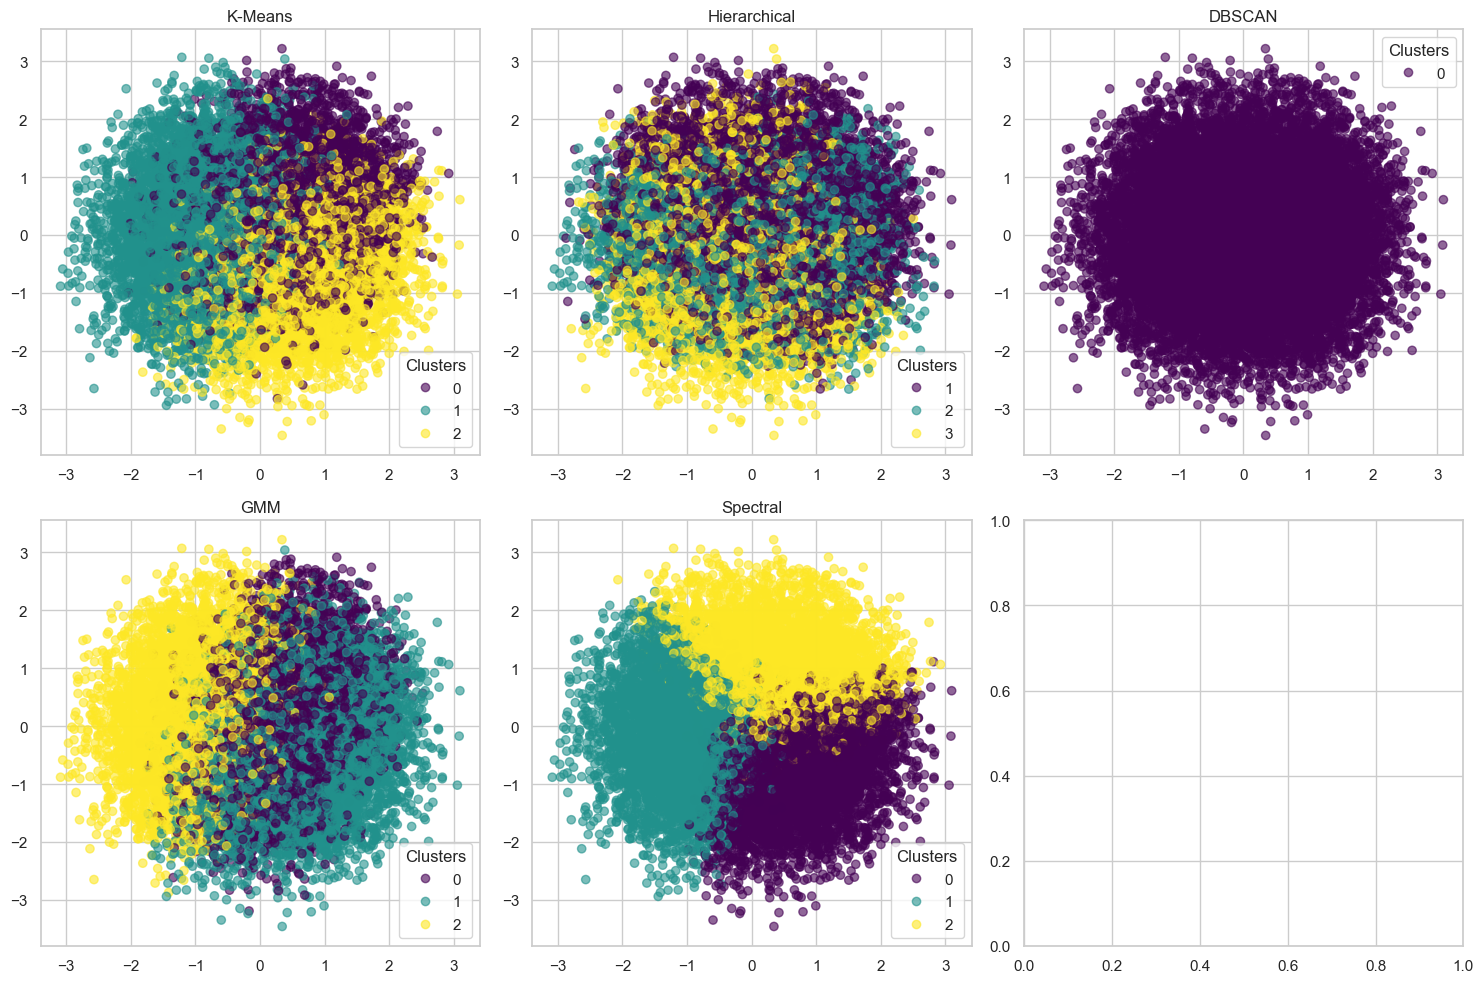

In [42]:
# Applying clustering models

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA

# Load dataset 
df = pd.read_csv('cleaned_phone_usage_data.csv')

# Select relevant features 
features = ['Screen Time (hrs/day)', 'Data Usage (GB/month)', 'Calls Duration (mins/day)',
    'Number of Apps Installed', 'Social Media Time (hrs/day)',
    'Streaming Time (hrs/day)', 'Gaming Time (hrs/day)']
X = df[features]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- K-Means Clustering ---
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f'K-Means Silhouette Score: {kmeans_silhouette:.4f}')

# --- Hierarchical Clustering ---
linkage_matrix = linkage(X_scaled, method='ward')
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()
hier_labels = fcluster(linkage_matrix, 3, criterion='maxclust')
hier_silhouette = silhouette_score(X_scaled, hier_labels)
print(f'Hierarchical Clustering Silhouette Score: {hier_silhouette:.4f}')

# --- DBSCAN ---
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else None
print(f'DBSCAN Silhouette Score: {dbscan_silhouette}')

# --- Gaussian Mixture Model ---
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
gmm_silhouette = silhouette_score(X_scaled, gmm_labels)
print(f'GMM Silhouette Score: {gmm_silhouette:.4f}')

# --- Spectral Clustering ---
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
spectral_labels = spectral.fit_predict(X_scaled)
spectral_silhouette = silhouette_score(X_scaled, spectral_labels)
print(f'Spectral Clustering Silhouette Score: {spectral_silhouette:.4f}')

# --- Visualization ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
cluster_methods = [
    ('K-Means', kmeans_labels),
    ('Hierarchical', hier_labels),
    ('DBSCAN', dbscan_labels),
    ('GMM', gmm_labels),
    ('Spectral', spectral_labels)
]

for ax, (title, labels) in zip(axes.flat, cluster_methods):
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
    ax.set_title(title)
    ax.legend(*scatter.legend_elements(), title="Clusters")

plt.tight_layout()
plt.show()

In [60]:
# Designing Streamlit app

import streamlit as st
import numpy as np

st.title("Phone Usage Prediction App")

age = st.number_input("Enter your age")
screen_time = st.number_input("Screen Time (hrs/day)")
data_usage = st.number_input("Data Usage (GB/month)")

if st.button("Predict"):
    input_data = np.array([[age, screen_time, data_usage]])  # Add all features
    prediction = best_model.predict(input_data)
    st.write(f"Predicted Primary Use: {prediction[0]}")

2025-03-20 17:48:22.173 
  command:

    streamlit run C:\Users\ratnakar\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-03-20 17:48:22.176 Session state does not function when running a script without `streamlit run`


In [68]:
import os
print(os.getcwd())

C:\Users\ratnakar


2025-03-28 17:52:11.174 
  command:

    streamlit run C:\Users\ratnakar\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
C:\Users\ratnakar\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


DeltaGenerator()

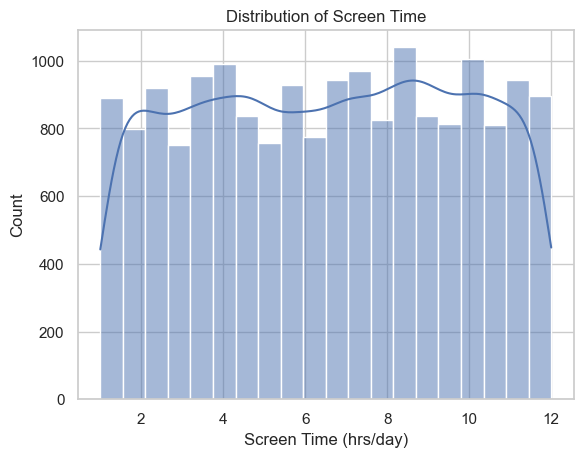

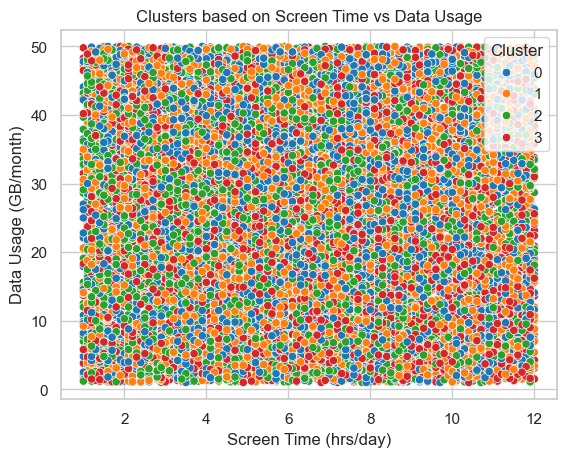

In [54]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load Dataset (Replace with actual dataset path)
df = pd.read_csv("cleaned_phone_usage_data.csv")  # Ensure the dataset is in the same folder

# Feature selection
features = ['Screen Time (hrs/day)', 'Data Usage (GB/month)', 'Calls Duration (mins/day)',
            'Number of Apps Installed', 'Social Media Time (hrs/day)',
            'Streaming Time (hrs/day)', 'Gaming Time (hrs/day)']
X = df[features]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Streamlit App Layout
st.title("📱 Phone Usage Behavior Analysis")

# --- 1. Display EDA Visualizations ---
st.subheader("Exploratory Data Analysis")

# Histogram of Screen Time
fig, ax = plt.subplots()
sns.histplot(df['Screen Time (hrs/day)'], bins=20, kde=True, ax=ax)
ax.set_title("Distribution of Screen Time")
st.pyplot(fig)

# --- 2. User Input for Primary Use Prediction ---
st.subheader("📊 Enter User Data for Classification")
screen_time = st.slider("Screen Time (hrs/day)", 0.5, 12.0, 3.0)
data_usage = st.slider("Data Usage (GB/month)", 0.1, 100.0, 10.0)
calls_duration = st.slider("Calls Duration (mins/day)", 0, 300, 60)
num_apps = st.slider("Number of Apps Installed", 5, 100, 30)
social_media = st.slider("Social Media Time (hrs/day)", 0, 10, 2)
streaming_time = st.slider("Streaming Time (hrs/day)", 0, 10, 2)
gaming_time = st.slider("Gaming Time (hrs/day)", 0, 10, 2)

user_input = np.array([[screen_time, data_usage, calls_duration, num_apps, social_media, streaming_time, gaming_time]])
user_input_scaled = scaler.transform(user_input)

# --- 3. Predict Cluster ---
st.subheader("📌 Cluster Prediction")
predicted_cluster = kmeans.predict(user_input_scaled)[0]
st.write(f"The user belongs to **Cluster {predicted_cluster}**")

# Display Clustering Results
st.subheader("📍 Cluster Analysis")
fig, ax = plt.subplots()
sns.scatterplot(x=df['Screen Time (hrs/day)'], y=df['Data Usage (GB/month)'], hue=df['Cluster'], palette='tab10', ax=ax)
ax.set_title("Clusters based on Screen Time vs Data Usage")
st.pyplot(fig)